In [1]:
import numpy as np
import random
import operator
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ZTL = pd.read_csv('ZTL.csv', index_col=0)
ZPL = pd.read_csv('ZPL.csv', index_col=0)
ZPR = pd.read_csv('ZPR.csv', index_col=0)

In [3]:
class Port:
  def __init__(self, name,port_type):
    self.name = name
    self.port_type = port_type
  def __repr__(self):
    if self.port_type == 'U':
      port_type_name = 'Utama'
    elif self.port_type == 'P':
      port_type_name = 'Pengumpul'
    elif self.port_type == 'R':
      port_type_name = 'Pengumpan'
    else:
      port_type_name = 'NOT DEFINED'

    return port_type_name + ":" + self.name
    

In [4]:
class Ship:
  def __init__(self, ship_type, route=[]):
    self.ship_type = ship_type
    self.route = route
    
  def Z(self,*ports):
    if self.ship_type == 'TL':
      df = ZTL
      string = 'ZTL'
      Z = float(df[(df[ports[0].port_type] == ports[0].name) & (df[ports[1].port_type] == ports[1].name)][string].values)

    elif self.ship_type == 'PR':
      df = ZPR
      string = 'ZPR'
      Z = float(df[(df[ports[0].port_type] == ports[0].name) & (df[ports[1].port_type] == ports[1].name)][string].values)

    elif self.ship_type == 'PL':
      Z = float(ZPL[(ZPL['U'] == ports[0].name) & (ZPL['U1'] == ports[1].name) & (ZPL['P'] == ports[2].name)]['ZPL'].values)
    
    else:
      print('ship_type not recognize')

    return Z
      

In [5]:
Tanjung_Perak = Port('Tanjung Perak', 'U')
Tanjung_Priok = Port('Tanjung Priok', 'U')
Saumlaki = Port('Saumlaki', 'P')
Ambon = Port('Ambon','P')
Namlea = Port('Namlea','R')
TL = Ship('TL')
PL = Ship('PL')
PR = Ship('PR')

In [6]:
route = Tanjung_Perak
# route[-1]

In [7]:
U_ports = list(pd.read_excel('Data Prep.xlsx', index_col=False, sheet_name='U_port', header=None)[0].values)
P_ports = list(pd.read_excel('Data Prep.xlsx', index_col=False, sheet_name='P_port', header=None)[0].values)
R_ports = list(pd.read_excel('Data Prep.xlsx', index_col=False, sheet_name='R_port', header=None)[0].values)

In [8]:
port_df = pd.DataFrame(columns = ['Name','Port'])
for i in U_ports:
  port_df = port_df.append(pd.DataFrame({'Name' : [i],
                               'Port' : ['U']}))
for i in P_ports:
  port_df = port_df.append(pd.DataFrame({'Name' : [i],
                               'Port' : ['P']}))
for i in R_ports:
  port_df = port_df.append(pd.DataFrame({'Name' : [i],
                               'Port' : ['R']}))
  
port_df = port_df.reset_index(drop = True)

In [10]:
ZTL_port = pd.read_excel('Data Prep.xlsx', index_col=False, sheet_name='ZTL_port')
ZTL_U = list(ZTL_port['U'].dropna().values)
ZTL_P = list(ZTL_port['P'].dropna().values)

ZPL_port = pd.read_excel('Data Prep.xlsx', index_col=False, sheet_name='ZPL_port')
ZPL_U = list(ZPL_port['U'].dropna().values)
ZPL_U1 = list(ZPL_port['U1'].dropna().values)
ZPL_P = list(ZPL_port['P'].dropna().values)

ZPR_port_Ambon = pd.read_excel('Data Prep.xlsx', index_col=False, sheet_name='ZPR_port_Ambon')
ZPR_Ambon_P = ['Ambon']
ZPR_Ambon_R = ZPR_port_Ambon['R']

ZPR_port_Tual = pd.read_excel('Data Prep.xlsx', index_col=False, sheet_name='ZPR_port_Tual')
ZPR_Tual_P = ['Tual']
ZPR_Tual_R = ZPR_port_Tual['R']

ZPR_port_Saumlaki = pd.read_excel('Data Prep.xlsx', index_col=False, sheet_name='ZPR_port_Saumlaki')
ZPR_Tual_P = ['Saumlaki']
ZPR_Tual_R = ZPR_port_Saumlaki['R']

In [11]:
def quick_port(port_name):
  port_name = str(port_df[port_df['Name'] == port_name]['Name'].values[0])
  port_type = str(port_df[port_df['Name'] == port_name]['Port'].values[0])
  return Port(port_name,port_type)


In [12]:
def random_port(Z):
  port = Z[random.randrange(len(Z))]
  new_random_port = quick_port(port)
  return new_random_port
  

In [13]:
def TL_route(n,starting_route):
  if n%2 == 0:
    raise ValueError("n must be odd number")
    
  route = []
  route.append(starting_route[0])

    
  i=0
  
  while i < n:
    route.append(random_port(ZTL_P))
    i+=1
    if i>=n:
      break
    route.append(random_port(ZTL_U))
    i+=1
    if i>=n:
      break

  return route

In [14]:
def PR_route(n,starting_route):
  if n%2 == 0:
    raise ValueError("n must be odd number")

  if starting_route.name is 'Ambon':
    df = ZPR_port_Ambon
  elif starting_route.name is 'Tual':
    df = ZPR_port_Tual
  elif starting_route.name is 'Saumlaki':
    df = ZPR_port_Saumlaki
  else:
    raise ValueError('starting route not available')

  route = []
  route.append(starting_route[0])

  i=0
  r_list = list(df['R'].values)

  while i < n:
    if route[-1]:
      route.append(random_port(r_list))
      i+=1
    if i>=n:
      break

      route.append(random_port(ZTL_U))
    i+=1
    if i>=n:
      break

  return route

In [15]:
def rand_route(ship,n,starting):
  if type(starting) is str:
    starting_port = quick_port(starting)
    route = [starting_port]
  elif type(starting) is Port:
    route = [starting]
  else:
    raise TypeError ("starting must be a string or Port_object")
  
  if ship.ship_type is 'TL':
    route = TL_route(n,route)
  else:
    print('BELOM DI BUAT')
  
  return route
  

In [16]:
def total_ZTL(ship, route):
  Z=0
  for i in range(len(route)-1):
    if route[i].port_type == 'U':    
      port_A = route[i]
      port_B = route[i+1]
    elif route[i].port_type == 'P':
      port_A = route[i+1]
      port_B = route[i]
    else:
      print('route type does not match')

    Z += ship.Z(port_A, port_B)
  return Z 

In [17]:
def Total_Profit(ship,route):
  if ship.ship_type == 'TL':
    Z = total_ZTL(ship,route)
  else:
    Z = 0
    print('BELOM DI BUAT')
  return Z

In [18]:
def initialPopulation_TL(ship, pop_size,starting, max_port = 21):
  if max_port%2 == 0:
    raise ValueError("max_port must be odd number")
  population = []
  i=0
  while i<max_port:
    port_size = random.randrange(3, max_port)
    if port_size%2 == 1:
      i+=1
      new_route = rand_route(ship, port_size,starting)
      population.append(new_route)
  return population

In [19]:
def rank_route(ship,population):
  fitnessResults = {}
  for i in range(0,len(population)):
    fitnessResults[i] = Total_Profit(ship,population[i])
  return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [20]:
def selection(ranked_population, n_elite):
    selectionResults = []
    df = pd.DataFrame(np.array(ranked_population), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, n_elite):
        selectionResults.append(ranked_population[i][0])
    for i in range(0, len(ranked_population) - n_elite):
        pick = 100*random.random()
        for i in range(0, len(ranked_population)):
            if pick <= df.iat[i,3]:
                selectionResults.append(ranked_population[i][0])
                break
    return selectionResults

In [21]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [22]:
def breed(parent1, parent2):
    child = parent1.copy()

    
    shortest_gene = min(len(parent1),len(parent2))
    
    geneA = int(random.random() * shortest_gene)
    geneB = int(random.random() * shortest_gene)
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)
    
    gene_swap_P2 = parent2[startGene:endGene]
    
    child[startGene:endGene] = gene_swap_P2

    return child

In [23]:
def breedPopulation(ship,matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
      children.append(matingpool[i])
    
    for i in range(0, length-(int(0.3*length))):
      child = breed(pool[i], pool[len(matingpool)-i-1])
      children.append(child)
        
    for i in range(length-(int(0.03*length)),length):
      children.append(rand_route(ship,len(children[0]),children[0][0]))
    return children

In [24]:
def mutate(ship, individual, mutationRate):
    for mutated in range(len(individual)):
        if(random.random() < mutationRate):
          if ship.ship_type == 'TL':
            Z_df = ZTL_port
            port_type = individual[mutated].port_type
            port_list = Z_df[port_type].dropna().values
            new_port_name = random.choice(port_list)
            
            port_name = str(port_df[port_df['Name'] == new_port_name]['Name'].values[0])
            port_type = str(port_df[port_df['Name'] == new_port_name]['Port'].values[0])
            new_port = Port(port_name,port_type)
            individual[mutated] = new_port
          
          
          else:
            print('SHIP TYPE BELOM BUAT')
            
    return individual

In [25]:
def mutatePopulation(ship,population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(ship,population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [26]:
def nextGeneration(ship,currentGen, eliteSize, mutationRate):
    popRanked = rank_route(ship,currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(ship,matingpool, eliteSize)
    nextGeneration = mutatePopulation(ship,children, mutationRate)
    return nextGeneration

In [27]:
def geneticAlgorithmPlot_TL(ship, starting, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation_TL(ship, popSize,starting)
#     print(str(pop))
    print("Initial Profit: " + str(rank_route(ship,pop)[0][1]))

    progress = []
    best_progress = []
    best_route_overall = pop[rank_route(ship,pop)[0][0]]
    best_gene_Z = rank_route(ship,pop)[0][1]
    
    progress.append(rank_route(ship,pop)[0][1])
    best_progress.append(rank_route(ship,pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(ship,pop, eliteSize, mutationRate)
        if (rank_route(ship,pop)[0][1]) > best_gene_Z : 
          best_gene_Z = (rank_route(ship,pop)[0][1])
          best_route_overall = pop[rank_route(ship,pop)[0][0]]
          
        
        best_progress.append(best_gene_Z)
        progress.append(rank_route(ship,pop)[0][1])

        
        
        print('iteration: ' + str(i+1) + ' current best Profit: ' + str(rank_route(ship,pop)[0][1]) + ' overall best Profit: ' + str(best_gene_Z)) 
        
    print("Final Profit: " + str(rank_route(ship,pop)[0][1]))
    
    
    bestRouteIndex = rank_route(ship,pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    
    
    plt.plot(best_progress)
    plt.plot(progress)
    plt.ylabel('Profit')
    plt.xlabel('Generation')
    plt.show()
    
    return bestRoute,best_route_overall

[[Utama:Tanjung Perak, Pengumpul:Moa, Utama:Makassar, Pengumpul:Dobo, Utama:Makassar, Pengumpul:Namrole, Utama:Tanjung Perak, Pengumpul:Namrole, Utama:Makassar, Pengumpul:Dobo, Utama:Makassar, Pengumpul:Dobo], [Utama:Tanjung Perak, Pengumpul:Moa, Utama:Tanjung Perak, Pengumpul:Dobo, Utama:Tanjung Perak, Pengumpul:Saumlaki, Utama:Makassar, Pengumpul:Namrole], [Utama:Tanjung Perak, Pengumpul:Dobo, Utama:Tanjung Perak, Pengumpul:Kisar, Utama:Makassar, Pengumpul:Namrole, Utama:Makassar, Pengumpul:Kisar, Utama:Tanjung Perak, Pengumpul:Dobo, Utama:Tanjung Perak, Pengumpul:Dobo, Utama:Makassar, Pengumpul:Namrole, Utama:Tanjung Perak, Pengumpul:Kisar, Utama:Makassar, Pengumpul:Saumlaki], [Utama:Tanjung Perak, Pengumpul:Kisar, Utama:Tanjung Perak, Pengumpul:Namrole, Utama:Makassar, Pengumpul:Dobo, Utama:Tanjung Perak, Pengumpul:Moa, Utama:Tanjung Perak, Pengumpul:Moa, Utama:Makassar, Pengumpul:Dobo, Utama:Tanjung Perak, Pengumpul:Namrole, Utama:Makassar, Pengumpul:Saumlaki, Utama:Tanjung Perak,

iteration: 39 current best Profit: 2211897119881.55 overall best Profit: 2211897119881.55
iteration: 40 current best Profit: 2211897119881.55 overall best Profit: 2211897119881.55
iteration: 41 current best Profit: 2211897119881.55 overall best Profit: 2211897119881.55
iteration: 42 current best Profit: 2211897119881.55 overall best Profit: 2211897119881.55
iteration: 43 current best Profit: 2211897119881.55 overall best Profit: 2211897119881.55
iteration: 44 current best Profit: 2382932987194.54 overall best Profit: 2382932987194.54
iteration: 45 current best Profit: 2382932987194.54 overall best Profit: 2382932987194.54
iteration: 46 current best Profit: 2382932987194.54 overall best Profit: 2382932987194.54
iteration: 47 current best Profit: 2382932987194.54 overall best Profit: 2382932987194.54
iteration: 48 current best Profit: 2382932987194.54 overall best Profit: 2382932987194.54
iteration: 49 current best Profit: 2382932987194.54 overall best Profit: 2382932987194.54
iteration:

iteration: 130 current best Profit: 2965136771831.25 overall best Profit: 2965136771831.25
iteration: 131 current best Profit: 2798920226831.25 overall best Profit: 2965136771831.25
iteration: 132 current best Profit: 2798920226831.25 overall best Profit: 2965136771831.25
iteration: 133 current best Profit: 2798920226831.25 overall best Profit: 2965136771831.25
iteration: 134 current best Profit: 2798920226831.25 overall best Profit: 2965136771831.25
iteration: 135 current best Profit: 2798920226831.25 overall best Profit: 2965136771831.25
iteration: 136 current best Profit: 2798920226831.25 overall best Profit: 2965136771831.25
iteration: 137 current best Profit: 2798920226831.25 overall best Profit: 2965136771831.25
iteration: 138 current best Profit: 2798920226831.25 overall best Profit: 2965136771831.25
iteration: 139 current best Profit: 2798920226831.25 overall best Profit: 2965136771831.25
iteration: 140 current best Profit: 2798920226831.25 overall best Profit: 2965136771831.25

iteration: 221 current best Profit: 2965136771831.25 overall best Profit: 2965136771831.25
iteration: 222 current best Profit: 2965136771831.25 overall best Profit: 2965136771831.25
iteration: 223 current best Profit: 2965136771831.25 overall best Profit: 2965136771831.25
iteration: 224 current best Profit: 2965136771831.25 overall best Profit: 2965136771831.25
iteration: 225 current best Profit: 2965136771831.25 overall best Profit: 2965136771831.25
iteration: 226 current best Profit: 2965136771831.25 overall best Profit: 2965136771831.25
iteration: 227 current best Profit: 2965136771831.25 overall best Profit: 2965136771831.25
iteration: 228 current best Profit: 2965136771831.25 overall best Profit: 2965136771831.25
iteration: 229 current best Profit: 2965136771831.25 overall best Profit: 2965136771831.25
iteration: 230 current best Profit: 2965136771831.25 overall best Profit: 2965136771831.25
iteration: 231 current best Profit: 2965136771831.25 overall best Profit: 2965136771831.25

iteration: 312 current best Profit: 3131353316831.25 overall best Profit: 3131353316831.25
iteration: 313 current best Profit: 3131353316831.25 overall best Profit: 3131353316831.25
iteration: 314 current best Profit: 3131353316831.25 overall best Profit: 3131353316831.25
iteration: 315 current best Profit: 3131353316831.25 overall best Profit: 3131353316831.25
iteration: 316 current best Profit: 3131353316831.25 overall best Profit: 3131353316831.25
iteration: 317 current best Profit: 3131353316831.25 overall best Profit: 3131353316831.25
iteration: 318 current best Profit: 3131353316831.25 overall best Profit: 3131353316831.25
iteration: 319 current best Profit: 3131353316831.25 overall best Profit: 3131353316831.25
iteration: 320 current best Profit: 3131353316831.25 overall best Profit: 3131353316831.25
iteration: 321 current best Profit: 3131353316831.25 overall best Profit: 3131353316831.25
iteration: 322 current best Profit: 3131353316831.25 overall best Profit: 3131353316831.25

iteration: 403 current best Profit: 3131353316831.25 overall best Profit: 3131353316831.25
iteration: 404 current best Profit: 3131353316831.25 overall best Profit: 3131353316831.25
iteration: 405 current best Profit: 3131353316831.25 overall best Profit: 3131353316831.25
iteration: 406 current best Profit: 3131353316831.25 overall best Profit: 3131353316831.25
iteration: 407 current best Profit: 3131353316831.25 overall best Profit: 3131353316831.25
iteration: 408 current best Profit: 3131353316831.25 overall best Profit: 3131353316831.25
iteration: 409 current best Profit: 3131353316831.25 overall best Profit: 3131353316831.25
iteration: 410 current best Profit: 3131353316831.25 overall best Profit: 3131353316831.25
iteration: 411 current best Profit: 3131353316831.25 overall best Profit: 3131353316831.25
iteration: 412 current best Profit: 3131353316831.25 overall best Profit: 3131353316831.25
iteration: 413 current best Profit: 3131353316831.25 overall best Profit: 3131353316831.25

iteration: 494 current best Profit: 3131353316831.25 overall best Profit: 3131353316831.25
iteration: 495 current best Profit: 3131353316831.25 overall best Profit: 3131353316831.25
iteration: 496 current best Profit: 3131353316831.25 overall best Profit: 3131353316831.25
iteration: 497 current best Profit: 3131353316831.25 overall best Profit: 3131353316831.25
iteration: 498 current best Profit: 3131353316831.25 overall best Profit: 3131353316831.25
iteration: 499 current best Profit: 3131353316831.25 overall best Profit: 3131353316831.25
iteration: 500 current best Profit: 3131353316831.25 overall best Profit: 3131353316831.25
Final Profit: 3131353316831.25


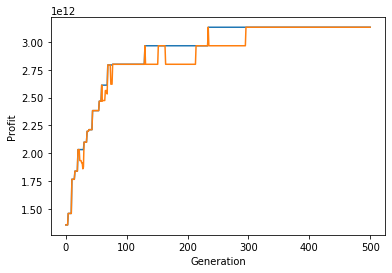

In [28]:
TL1 = Ship('TL')
initial_port = initialPopulation_TL(TL1,30,Tanjung_Perak,max_port=23)
current_gene, best_gene = geneticAlgorithmPlot_TL(TL1,Tanjung_Perak, popSize=50, eliteSize=15, mutationRate=0.007, generations=500)